Project Description
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.
You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.

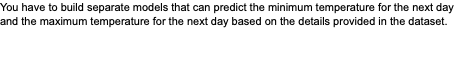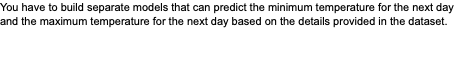!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/refs/heads/main/temperature.csv")

In [4]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


here i can see only date has an object type other is float data so coberting date in date type

In [6]:
df["Date"]=pd.to_datetime(df["Date"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7750 non-null   float64       
 1   Date              7750 non-null   datetime64[ns]
 2   Present_Tmax      7682 non-null   float64       
 3   Present_Tmin      7682 non-null   float64       
 4   LDAPS_RHmin       7677 non-null   float64       
 5   LDAPS_RHmax       7677 non-null   float64       
 6   LDAPS_Tmax_lapse  7677 non-null   float64       
 7   LDAPS_Tmin_lapse  7677 non-null   float64       
 8   LDAPS_WS          7677 non-null   float64       
 9   LDAPS_LH          7677 non-null   float64       
 10  LDAPS_CC1         7677 non-null   float64       
 11  LDAPS_CC2         7677 non-null   float64       
 12  LDAPS_CC3         7677 non-null   float64       
 13  LDAPS_CC4         7677 non-null   float64       
 14  LDAPS_PPT1        7677 n

#atribute information
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

## here our target variables are Next_Tmax	and Next_Tmin so lets check which data has correlation with it.

<Axes: >

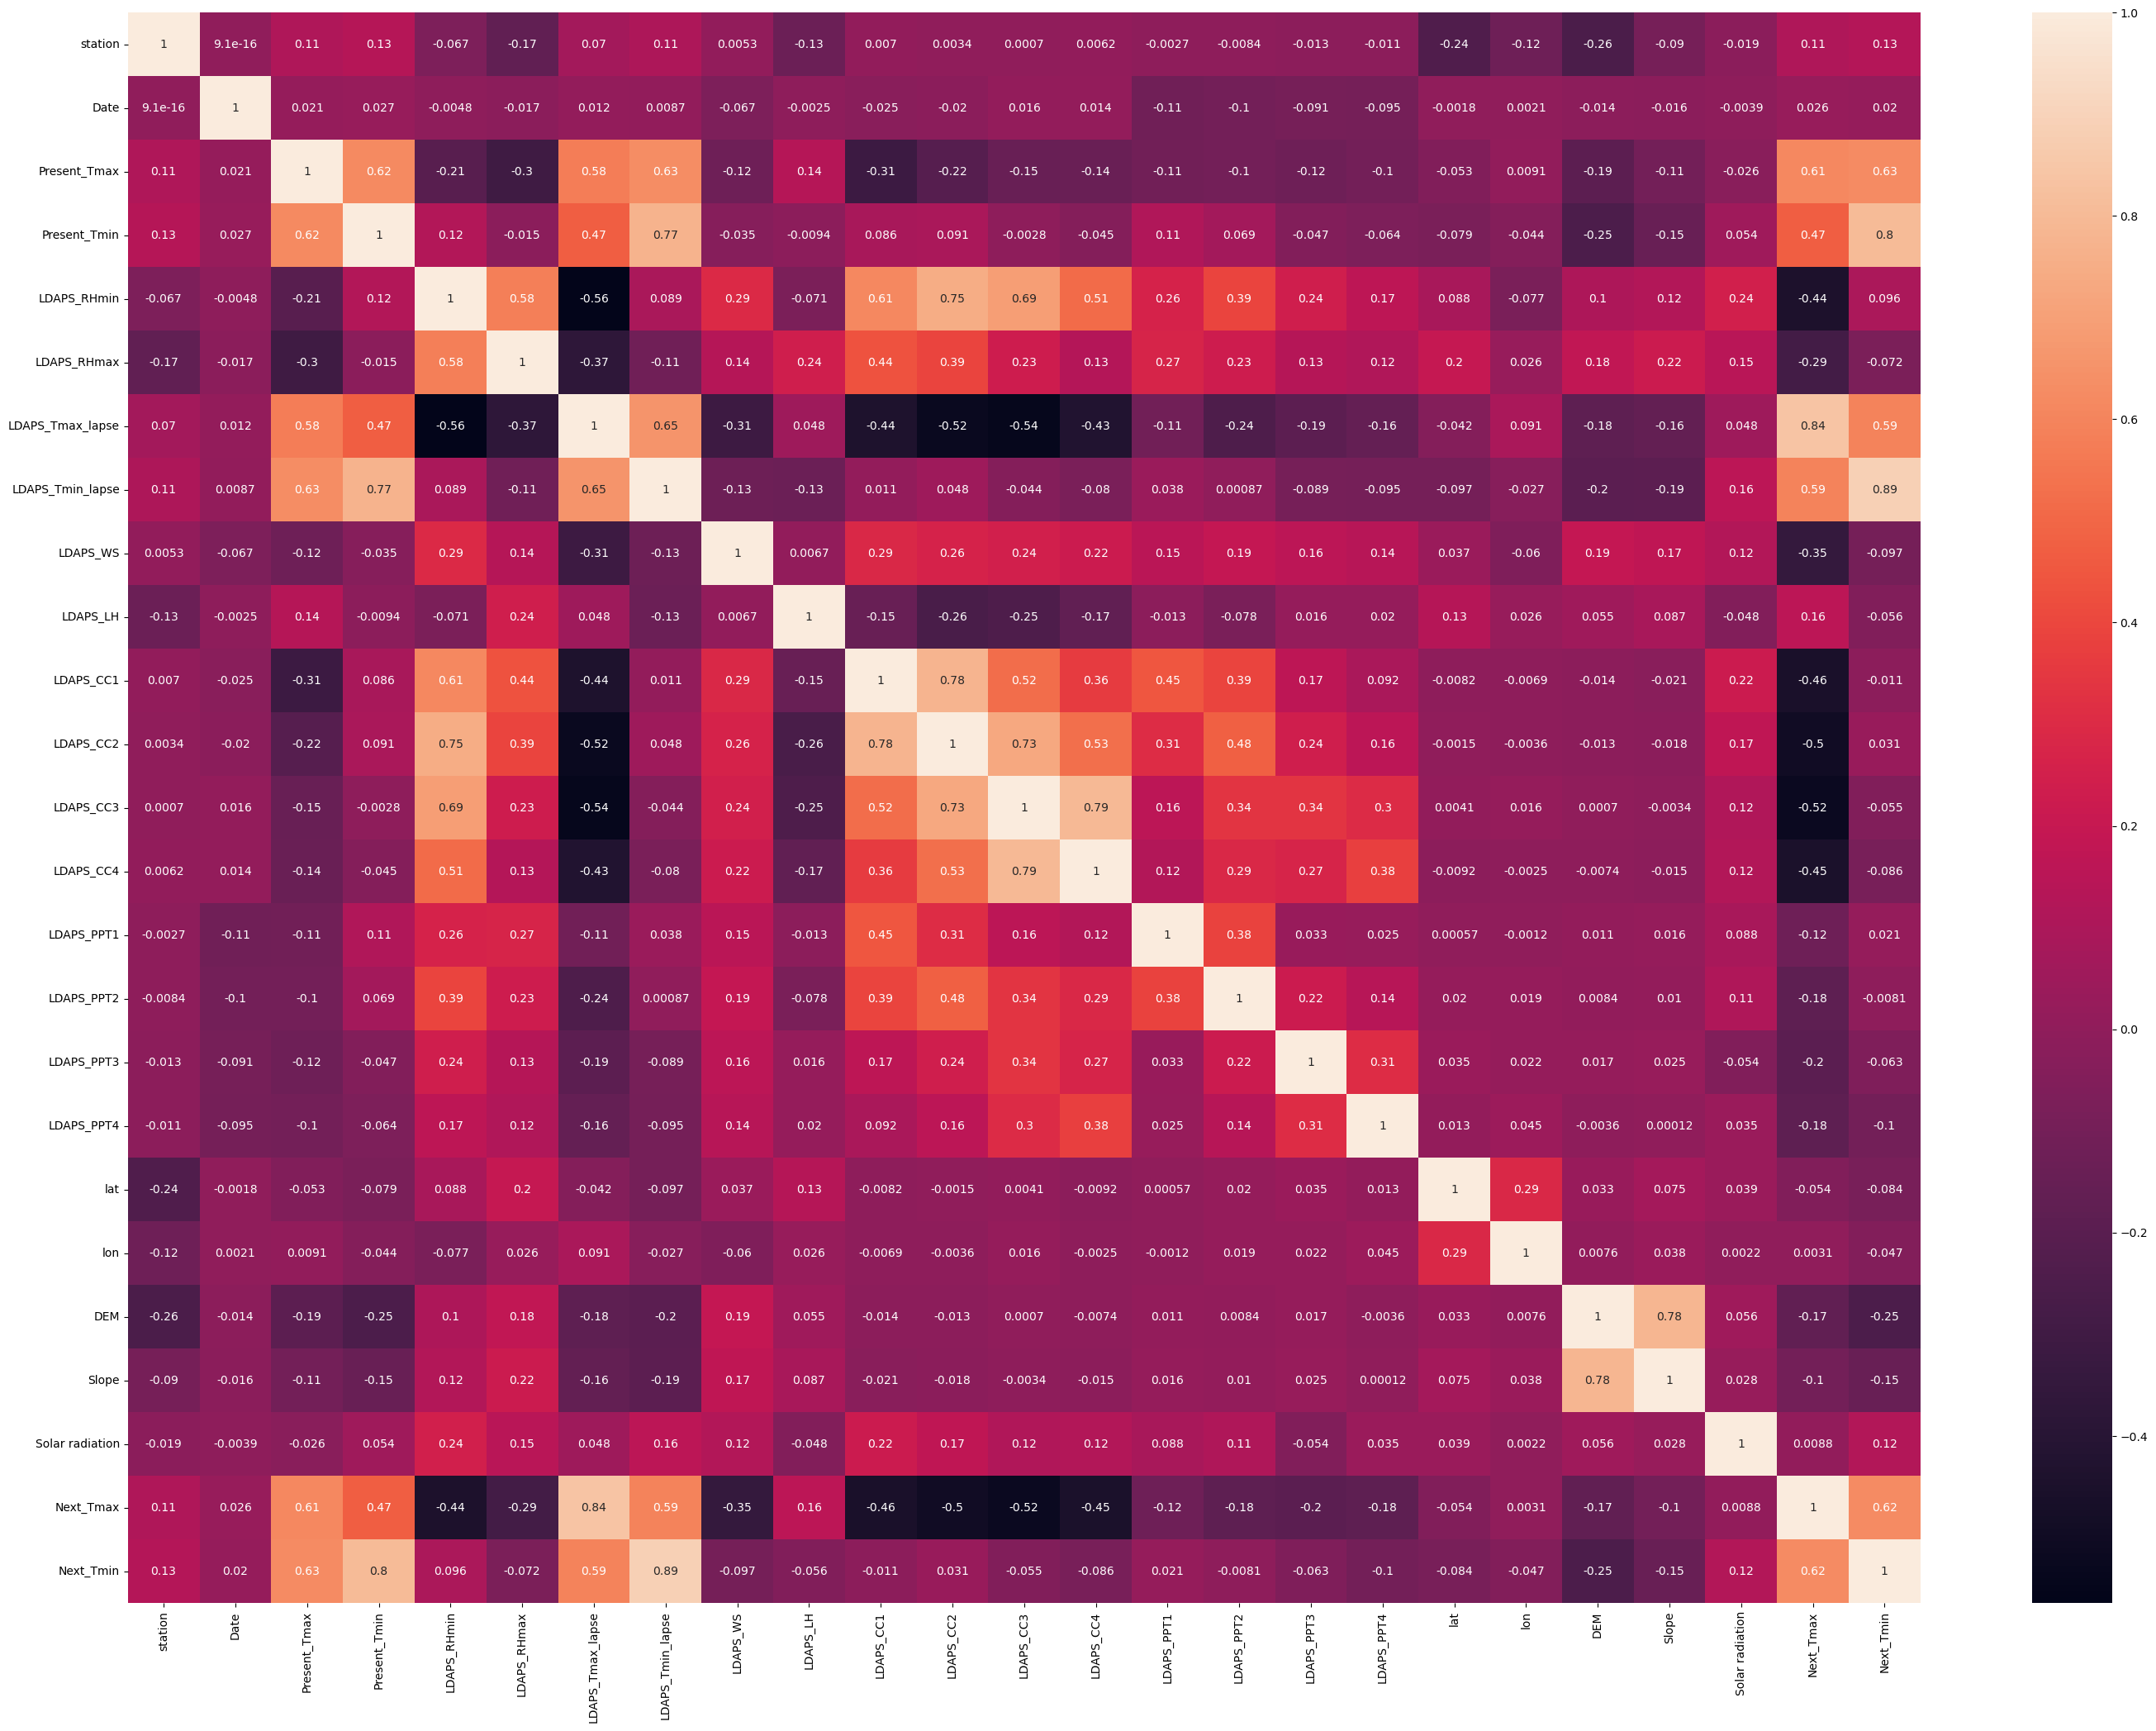

In [13]:
plt.figure(figsize=(35,25))
sns.heatmap(df.corr(),annot=True)

i do not see date coloumn creating much of impact on target variables so dropping it

In [14]:
df.drop("Date",axis=1,inplace=True)

In [15]:
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [16]:
df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [17]:
df.nunique()

station               25
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
dtype: int64

In [21]:
#filling all null values using median
df = df.fillna(df.median())

In [24]:
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [23]:
df.skew()

station             0.000000
Present_Tmax       -0.265337
Present_Tmin       -0.369481
LDAPS_RHmin         0.303565
LDAPS_RHmax        -0.860210
LDAPS_Tmax_lapse   -0.228767
LDAPS_Tmin_lapse   -0.584737
LDAPS_WS            1.584975
LDAPS_LH            0.678315
LDAPS_CC1           0.465003
LDAPS_CC2           0.477041
LDAPS_CC3           0.646670
LDAPS_CC4           0.673700
LDAPS_PPT1          5.395178
LDAPS_PPT2          5.776835
LDAPS_PPT3          6.458608
LDAPS_PPT4          6.826930
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340943
Next_Tmin          -0.405143
dtype: float64

In [26]:
df.shape

(7752, 24)

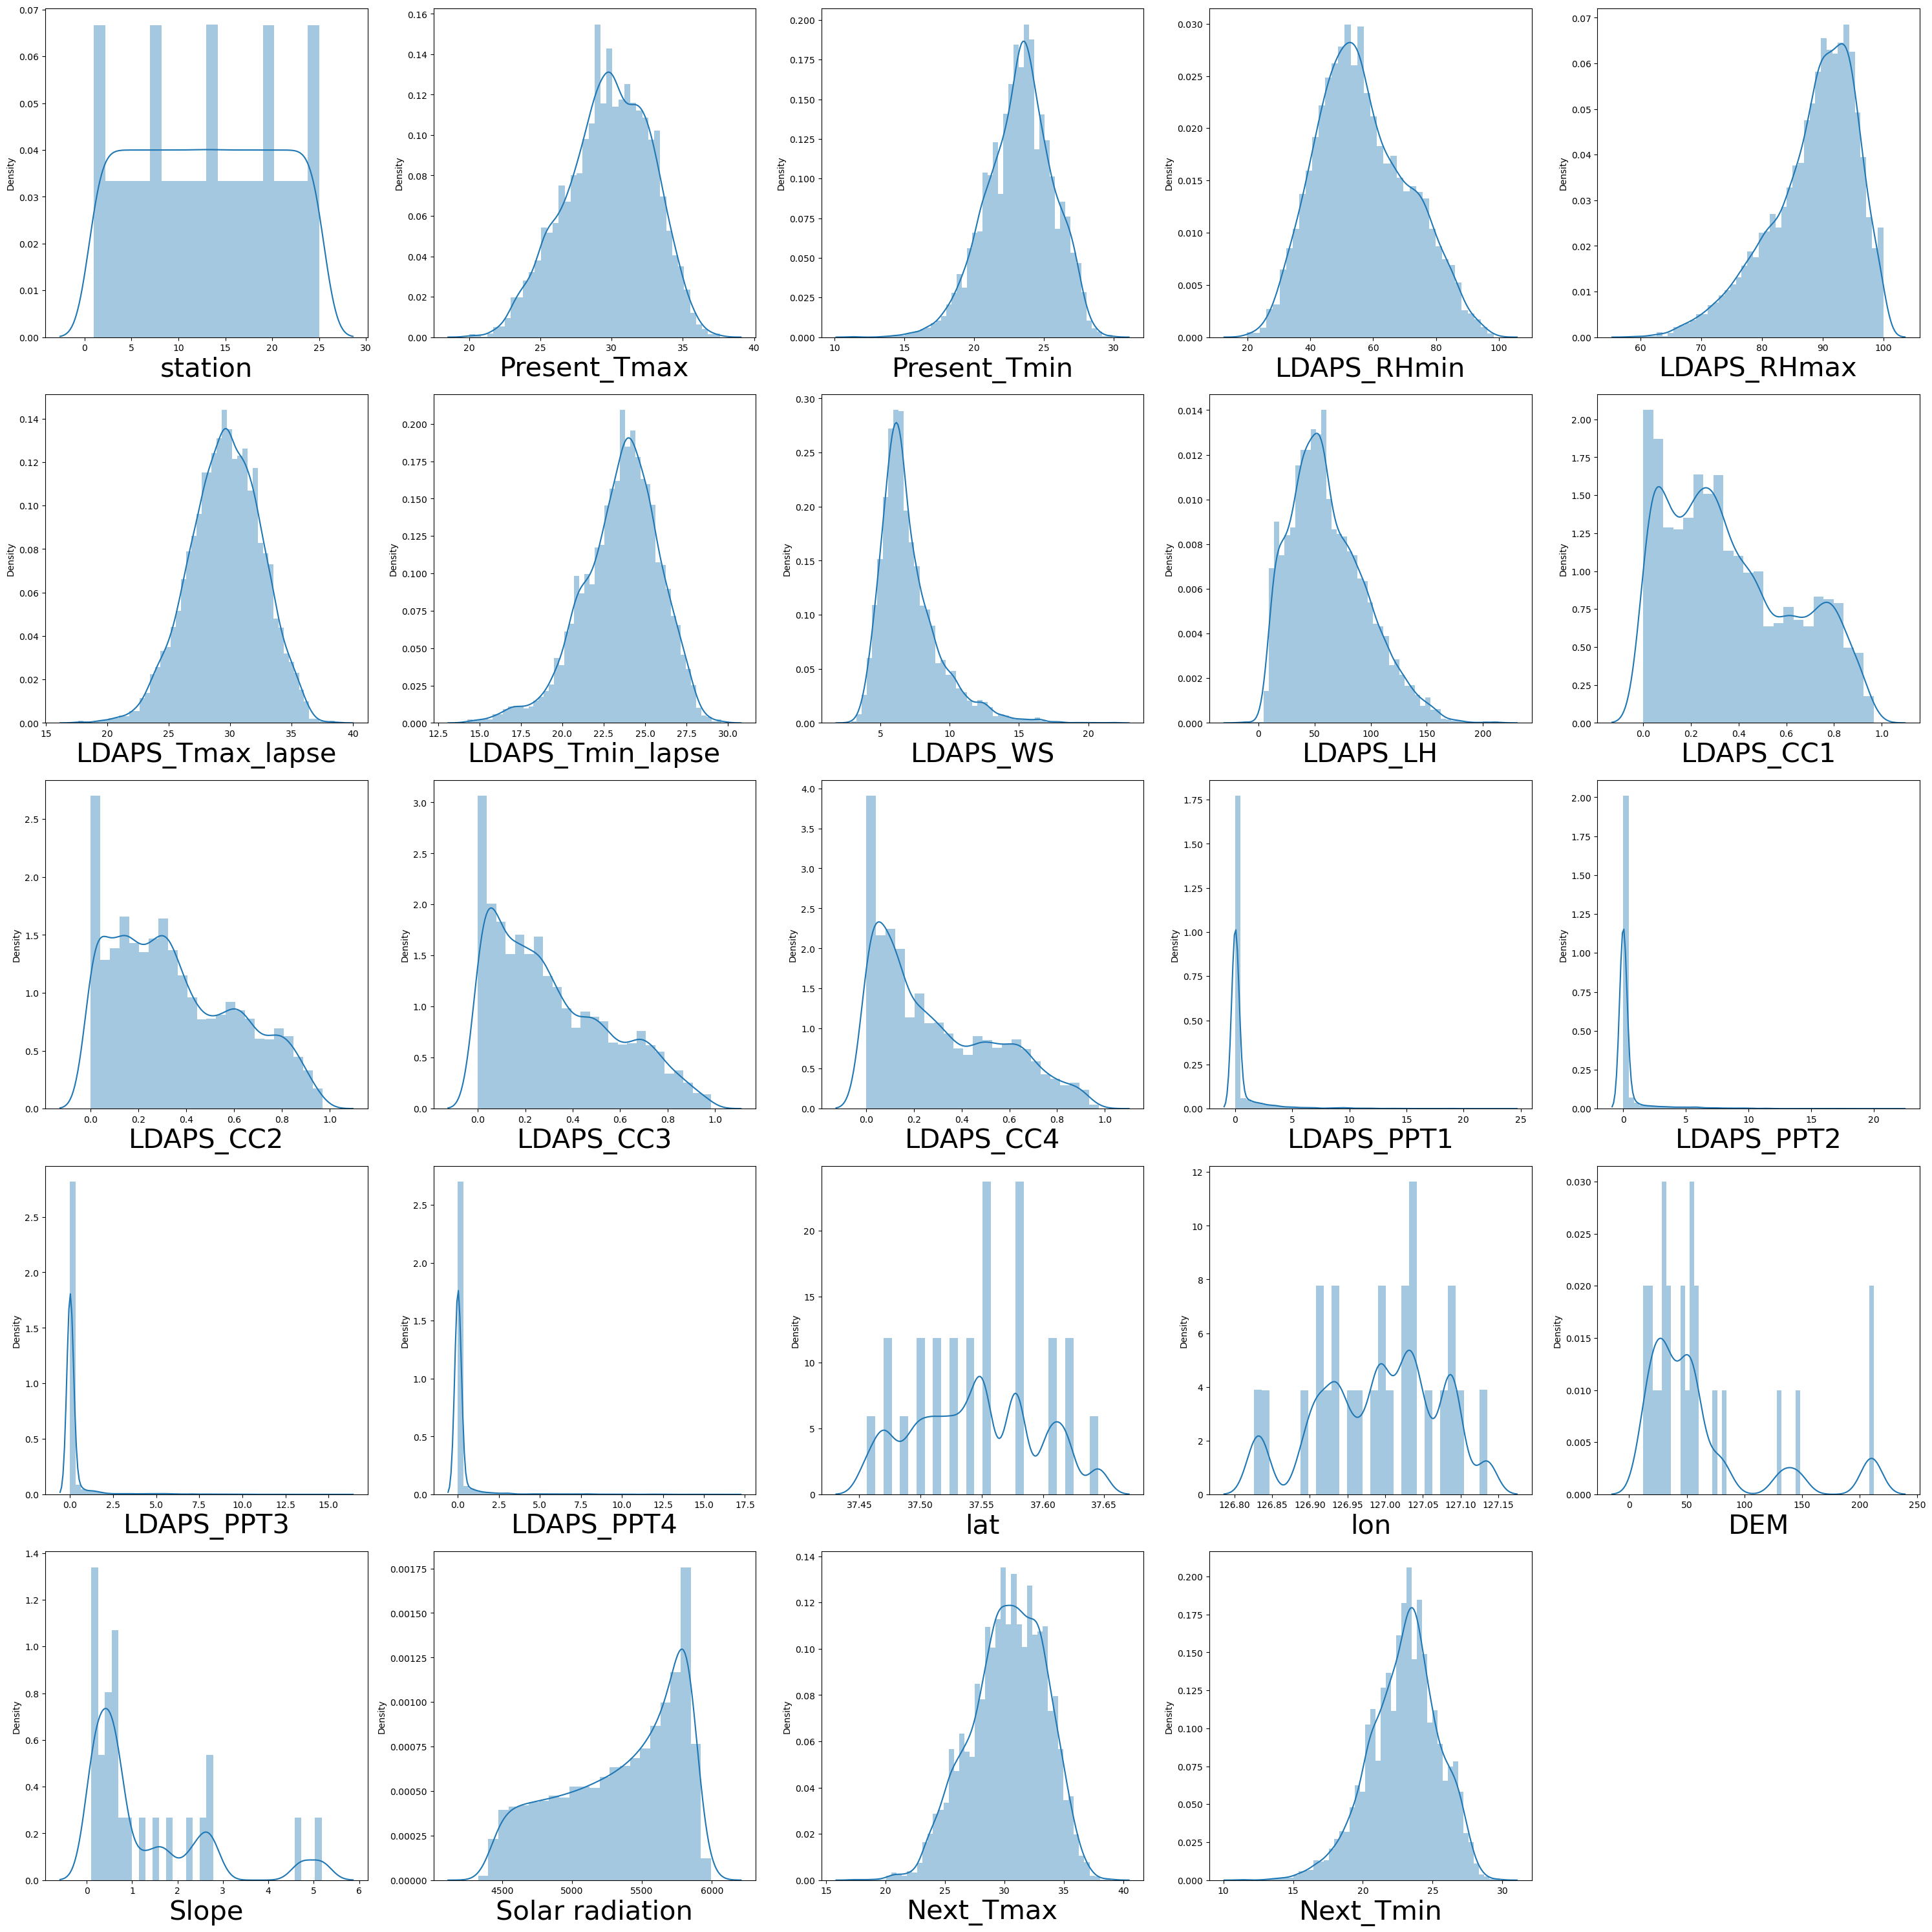

In [27]:
#lets check distribution of data
plt.figure(figsize=(30,30), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=25:
        ax = plt.subplot(5,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=30)
    plotnumber+=1
plt.tight_layout()

there so many colums with skewness 

In [31]:
#let's remove skewness i am removing skewness from columns with high skewness
from sklearn.preprocessing import power_transform

df[['LDAPS_WS',"LDAPS_RHmax",'LDAPS_LH','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope']]=power_transform(df[['LDAPS_WS',"LDAPS_RHmax",'LDAPS_LH','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope']])

In [32]:
df.skew()

station             0.000000
Present_Tmax       -0.265337
Present_Tmin       -0.369481
LDAPS_RHmin         0.303565
LDAPS_RHmax        -0.116481
LDAPS_Tmax_lapse   -0.228767
LDAPS_Tmin_lapse   -0.584737
LDAPS_WS            0.002449
LDAPS_LH            0.058865
LDAPS_CC1           0.465003
LDAPS_CC2           0.477041
LDAPS_CC3           0.646670
LDAPS_CC4           0.673700
LDAPS_PPT1          1.463941
LDAPS_PPT2          1.646417
LDAPS_PPT3          1.824919
LDAPS_PPT4          2.059400
lat                 0.087062
lon                -0.285213
DEM                 0.039456
Slope               0.233968
Solar radiation    -0.511210
Next_Tmax          -0.340943
Next_Tmin          -0.405143
dtype: float64

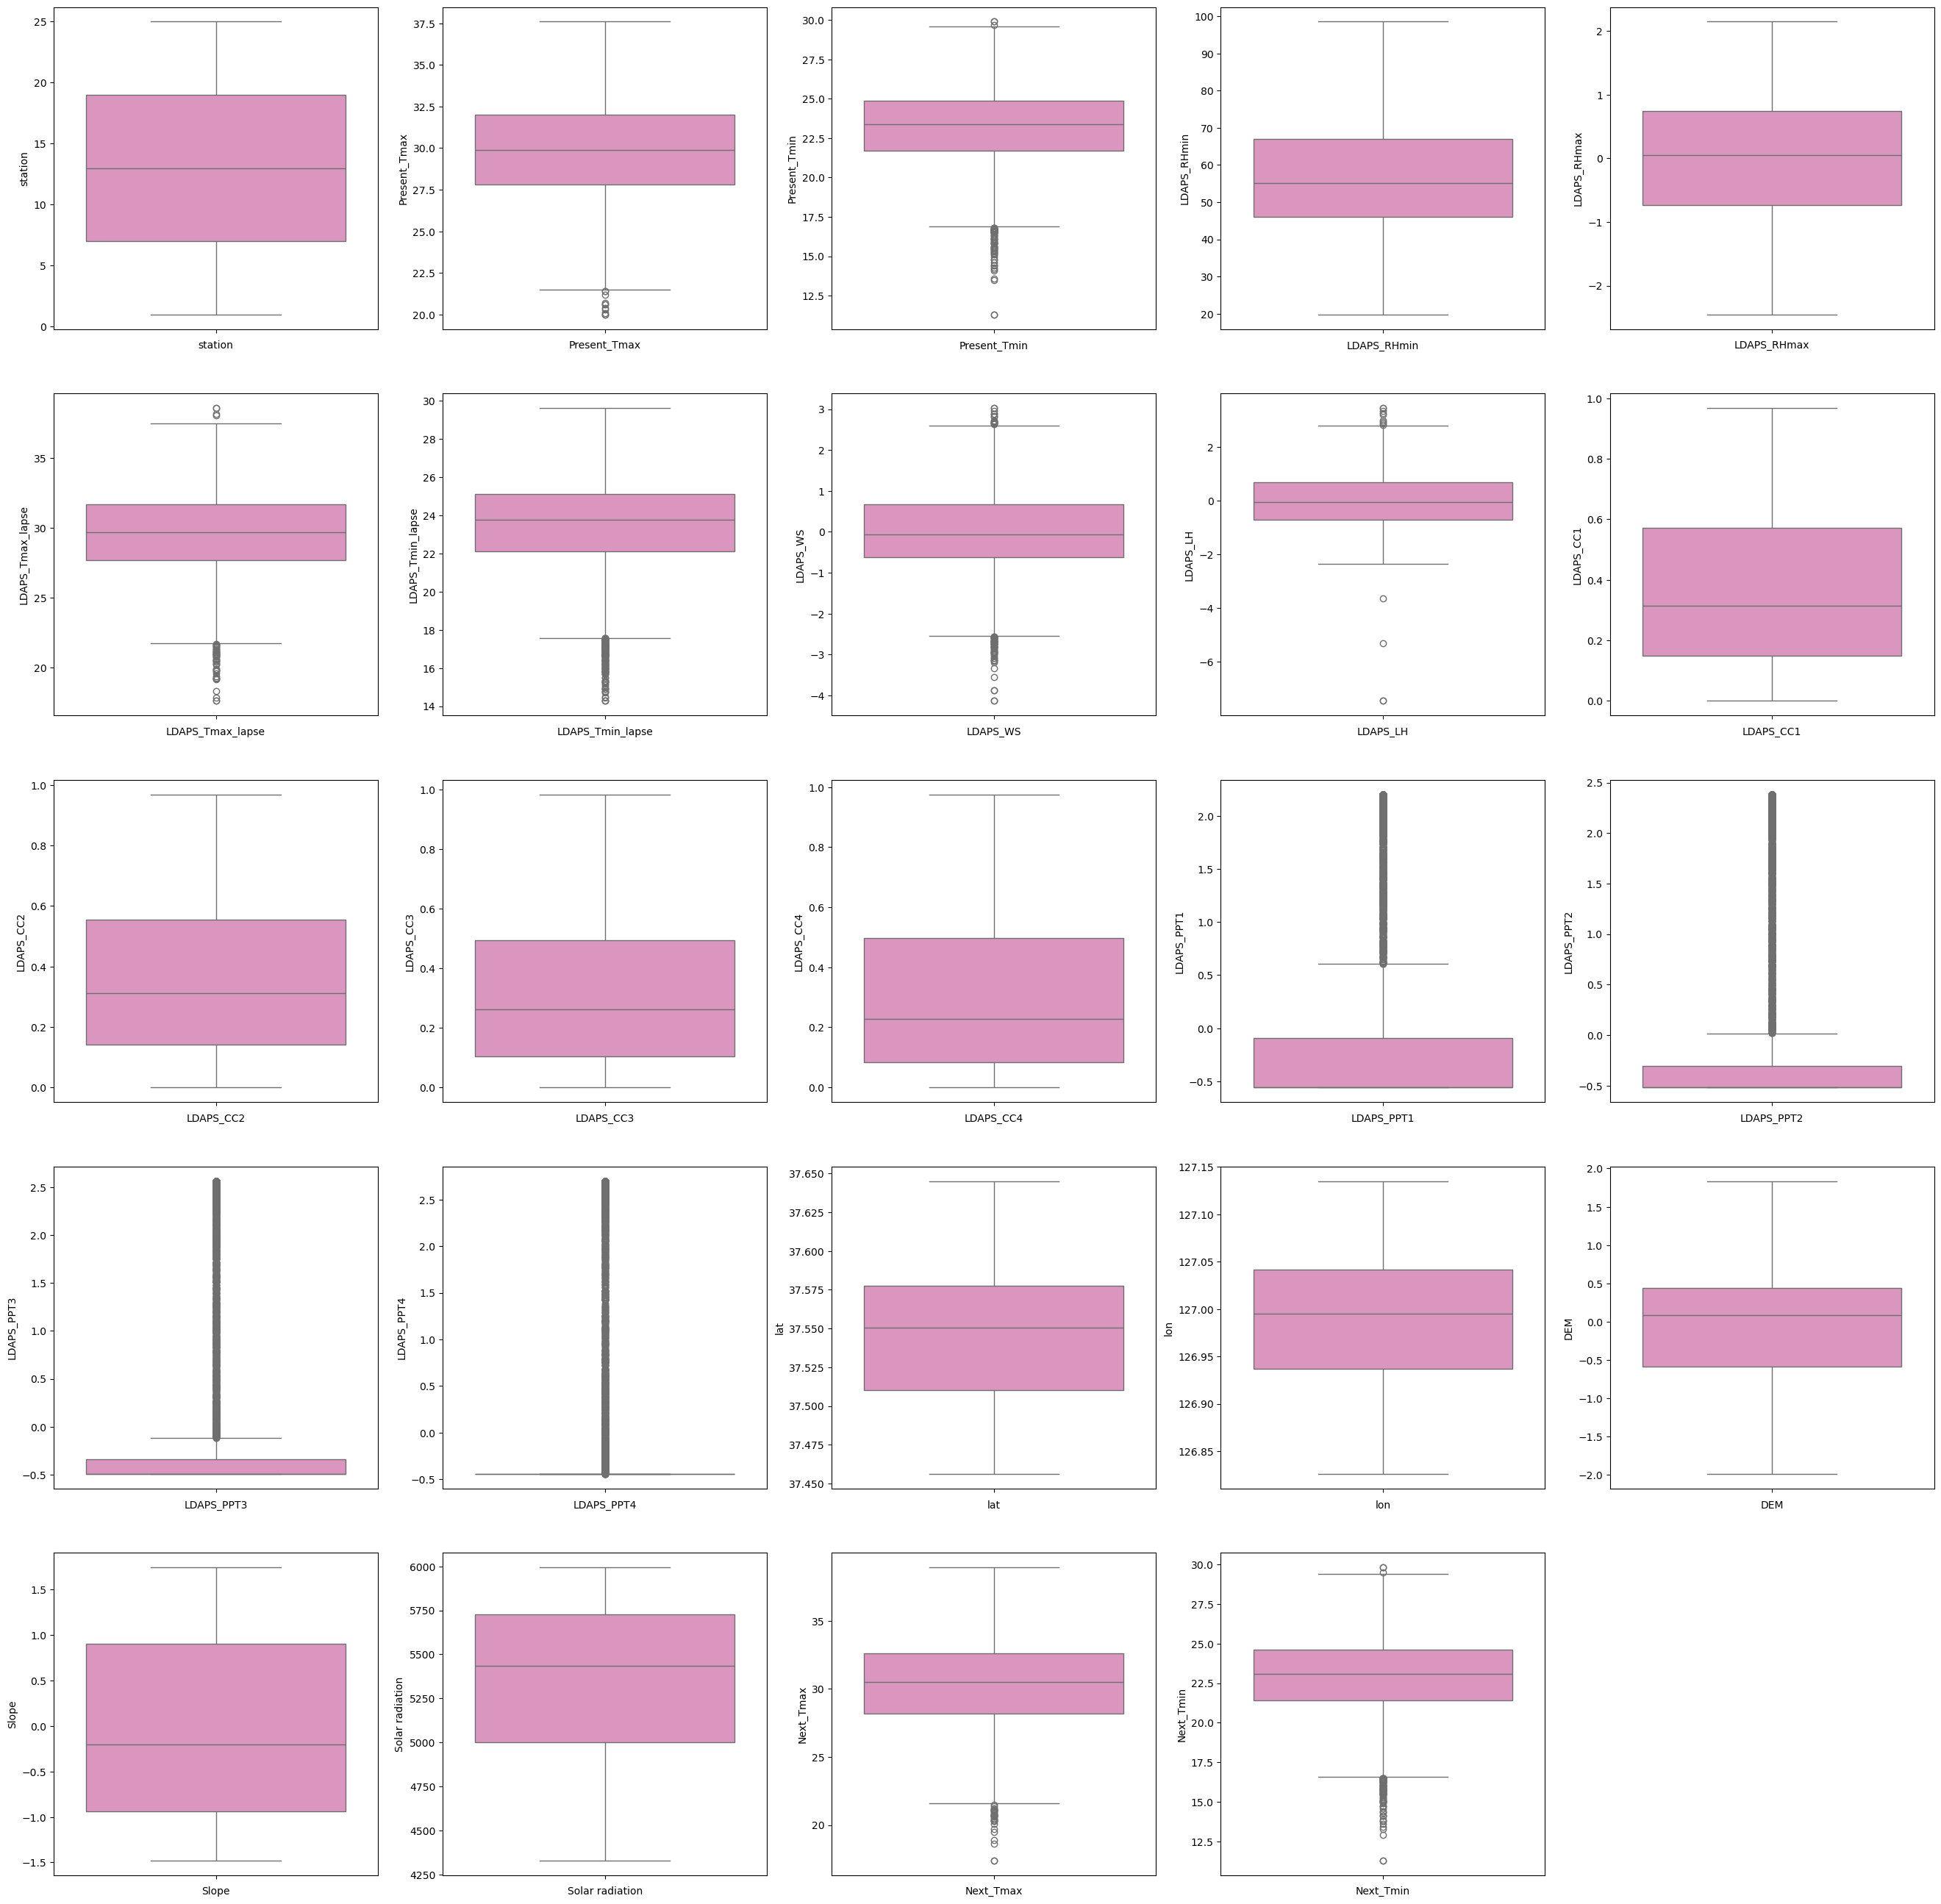

In [33]:
#lets check for outliers
plt.figure(figsize=(33,33))
n=1
for i in df:
    if n<=25:
        plt.subplot(5,5,n)
        sns.boxplot(df[i],palette="Set2_r")
        plt.xlabel(i)
    n+=1
plt.show()

In [34]:
#removing outliers
from scipy.stats import zscore

z=np.abs(zscore(df[['Present_Tmax','Present_Tmin','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']]))
print(np.where(z>3))

(array([1779, 1791, 2131, 2194, 2356, 2453, 2466, 2633, 2641, 2675, 2741,
       2742, 2775, 3191, 3209, 3215, 3216, 3266, 3479, 3481, 3525, 3566,
       4341, 4591, 4716, 4769, 5050, 5075, 5466, 5766, 6075, 6078, 6084,
       6091, 6094, 6101, 6109, 6115, 6116, 6125, 6125, 6125, 6144, 6150,
       6150, 6151, 6153, 6153, 6159, 6159, 6161, 6166, 6168, 6168, 6169,
       6169, 6175, 6175, 6175, 6176, 6176, 6176, 6177, 6178, 6178, 6179,
       6180, 6181, 6183, 6183, 6184, 6184, 6184, 6186, 6186, 6187, 6189,
       6190, 6190, 6191, 6191, 6191, 6192, 6193, 6193, 6194, 6194, 6195,
       6197, 6244, 6269, 7099, 7634, 7641, 7666, 7675, 7675, 7678, 7681,
       7683, 7684, 7691, 7693, 7694, 7700, 7700, 7700, 7700, 7701, 7702,
       7703, 7704, 7706, 7707, 7708, 7709, 7710, 7711, 7712, 7713, 7714,
       7715, 7716, 7717, 7718, 7719, 7719, 7720, 7721, 7722, 7723, 7725,
       7725, 7725, 7726, 7728, 7733, 7734, 7736, 7740, 7741, 7741, 7743,
       7744, 7744, 7750, 7750, 7750, 7750, 7750, 7

In [35]:
z = np.abs(zscore(df[['Present_Tmax','Present_Tmin','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']]))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (7752, 24)
Shape of the dataframe after removing outliers:  (7635, 24)
Percentage of data loss post outlier removal:  1.5092879256965945


### lets 1st predict Next_Tmax

In [40]:
#assigning feature and target data
x = df.drop('Next_Tmax',axis=1)
y = df['Next_Tmax']
print("feature dimension=",x.shape)
print('label Dimension',y.shape)

feature dimension= (7635, 23)
label Dimension (7635,)


In [41]:
#standard scaling of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin
0,-1.665619,-0.391082,-0.826791,0.104515,0.270393,-0.574091,-0.269337,0.101611,0.321279,-0.510197,...,-0.556227,-0.518063,-0.488615,-0.440374,1.202373,-0.002818,1.846647,1.322066,1.522899,-0.765539
1,-1.526995,0.712742,-0.739984,-0.309180,0.182925,0.053159,0.195960,-0.635308,-0.208650,-0.542554,...,-0.556227,-0.518063,-0.488615,-0.440374,1.202373,0.513713,0.063295,-0.379811,1.230202,-0.218044
2,-1.388370,0.609258,-0.002126,-0.555846,-0.779358,0.138107,0.436115,-0.316685,-1.390386,-0.604531,...,-0.556227,-0.518063,-0.488615,-0.440374,0.663583,0.841270,-0.358288,-0.944431,1.216567,0.371566
3,-1.249745,0.747236,0.041277,0.103417,1.320014,0.001590,-0.124851,-0.667284,0.213494,-0.577583,...,-0.556227,-0.518063,-0.488615,-0.440374,2.008562,0.387730,0.092266,1.243064,1.200957,0.540027
4,-1.111121,0.540269,-0.609774,-0.039194,0.107745,-0.206963,-0.052300,-0.602758,1.325841,-0.826667,...,-0.556227,-0.518063,-0.488615,-0.440374,0.126789,1.811342,-0.283973,-0.396228,1.207085,-0.218044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7630,1.106872,-2.322774,-2.389314,-2.212856,-1.389968,-0.666383,-2.398290,-0.023101,-1.965843,-1.204345,...,-0.556227,-0.518063,-0.488615,-0.440374,0.126789,0.614500,-0.716134,-0.273859,-2.117055,-2.239565
7631,1.245497,-2.529741,-2.562928,-1.839647,-0.814025,-1.057505,-2.619596,-0.578055,0.672481,-1.152358,...,-0.556227,-0.518063,-0.488615,-0.440374,-0.681395,1.194024,-1.001285,-1.350649,-2.150736,-2.492255
7632,1.384121,-2.253785,-2.693138,-2.071169,-1.333176,-1.182074,-2.184366,-0.309521,0.395344,-1.292024,...,-0.556227,-0.518063,-0.488615,-0.440374,-0.142605,-1.262652,-1.574810,-1.276180,-2.147159,-2.071105
7633,1.522746,-2.253785,-2.432718,-2.257618,-1.476472,-0.949719,-2.203447,-0.059284,-0.362309,-1.269634,...,-0.556227,-0.518063,-0.488615,-0.440374,-0.412000,-1.035882,-1.396882,-1.068389,-2.158860,-1.776300


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [43]:
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS=i
print('maximum r2 score',maxAccu,'on Random_state',maxRS)

maximum r2 score 0.7925875548960932 on Random_state 194


In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = maxRS)

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [46]:
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print(LR)
print('R2_Score:',r2_score(y_test,pred_LR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_LR))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_LR)))

LinearRegression()
R2_Score: 0.7908760034291384
R2_score on training data: 77.10386348433084
mean absolute error: 1.0560004702701922
Mean Squared Error: 1.9634538285995704
root mean squared error: 1.4012329672825894


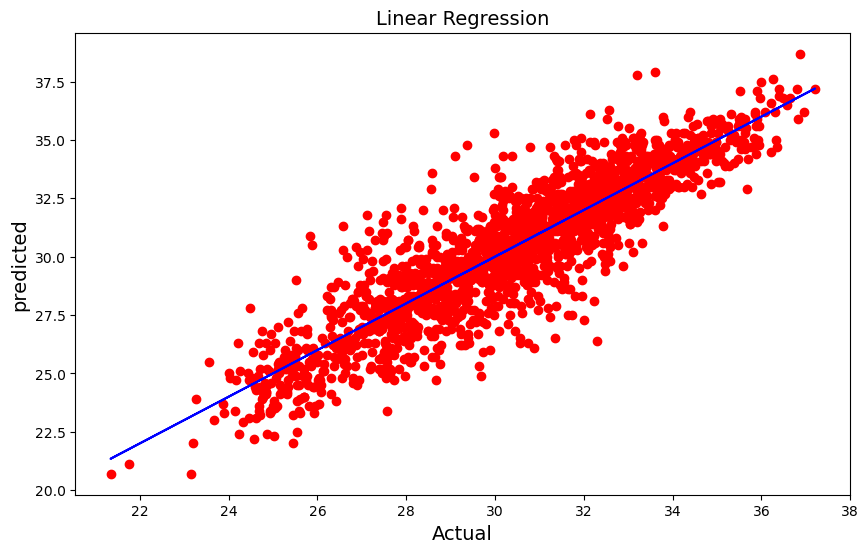

In [47]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_test,color='r')
plt.plot(pred_LR,pred_LR,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('predicted',fontsize=14)
plt.title('Linear Regression',fontsize=14)
plt.show()

In [48]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
pred_train=rfr.predict(x_train)
print(rfr )
print('R2_Score:',r2_score(y_test,pred_rfr ))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_rfr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rfr))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_rfr)))

RandomForestRegressor()
R2_Score: 0.9012651754218642
R2_score on training data: 98.5480574045497
mean absolute error: 0.7104442116291251
Mean Squared Error: 0.9270158973284439
root mean squared error: 0.9628166478247268


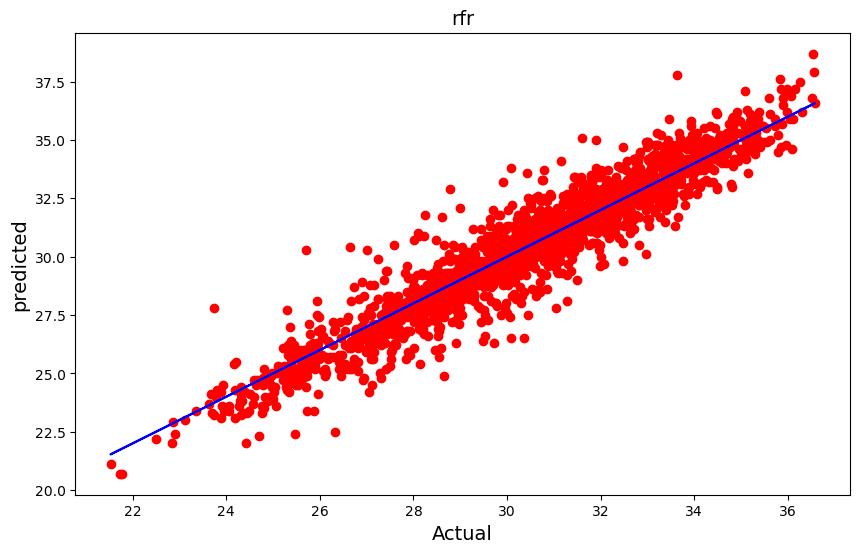

In [50]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_rfr,y=y_test,color='r')
plt.plot(pred_rfr,pred_rfr,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('predicted',fontsize=14)
plt.title('rfr',fontsize=14)
plt.show()

In [51]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print(GBR )
print('R2_Score:',r2_score(y_test,pred_GBR ))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_GBR))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_GBR)))

GradientBoostingRegressor()
R2_Score: 0.8506690131265684
R2_score on training data: 86.83779856967213
mean absolute error: 0.9056560823060337
Mean Squared Error: 1.402060512963845
root mean squared error: 1.184086362122225


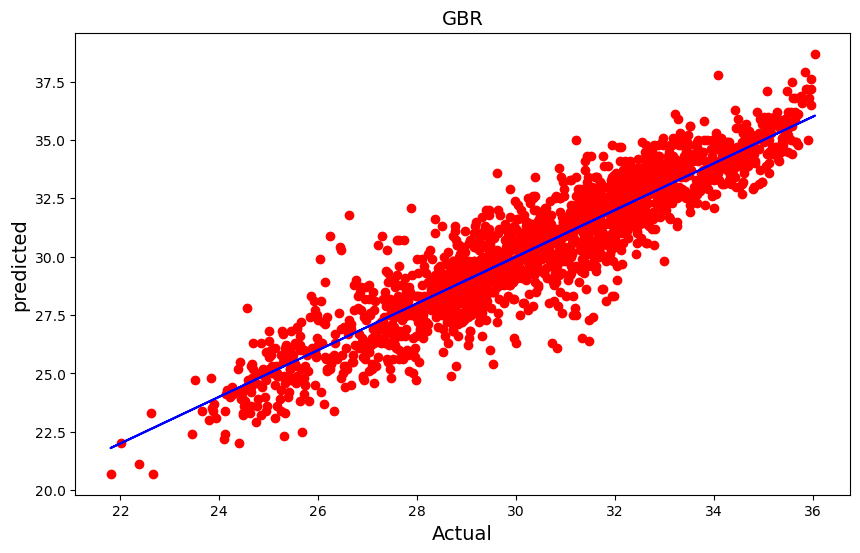

In [52]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_GBR,y=y_test,color='r')
plt.plot(pred_GBR,pred_GBR,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('predicted',fontsize=14)
plt.title('GBR',fontsize=14)
plt.show()

In [53]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print(knn)
print('R2_Score:',r2_score(y_test,pred_knn))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error:',mean_squared_error(y_test,pred_knn))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_knn)))

KNeighborsRegressor()
R2_Score: 0.856304627557261
R2_score on training data: 89.55087000074238
mean absolute error: 0.8784808800419067
Mean Squared Error: 1.3491480356207437
root mean squared error: 1.1615283189060626


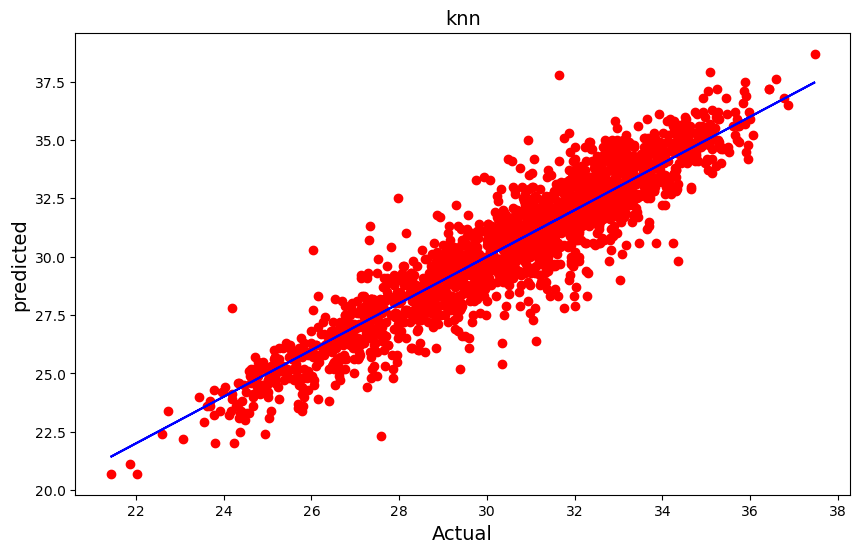

In [54]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_knn,y=y_test,color='r')
plt.plot(pred_knn,pred_knn,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('predicted',fontsize=14)
plt.title('knn',fontsize=14)
plt.show()

In [55]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred_DTR=DTR.predict(x_test)
pred_train=DTR.predict(x_train)
print(DTR)
print('R2_Score:',r2_score(y_test,pred_DTR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_DTR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_DTR))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_DTR)))

DecisionTreeRegressor()
R2_Score: 0.7726715962045975
R2_score on training data: 100.0
mean absolute error: 1.0531168150864327
Mean Squared Error: 2.134374017810372
root mean squared error: 1.4609496972210823


In [59]:
from xgboost import XGBRegressor
XGB=XGBRegressor()
XGB.fit(x_train,y_train)
pred_XGB=XGB.predict(x_test)
pred_train=XGB.predict(x_train)
print(XGB)
print('R2_Score:',r2_score(y_test,pred_XGB))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_XGB))
print('Mean Squared Error:',mean_squared_error(y_test,pred_XGB))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_XGB)))

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
R2_Score: 0.9118860788119157
R2_score on training data: 99.03472022108232
mean absolute error: 0.6855603031739943
Mean Squared Error: 0.8272968131184372
root mean squared error: 0.9095585814659972


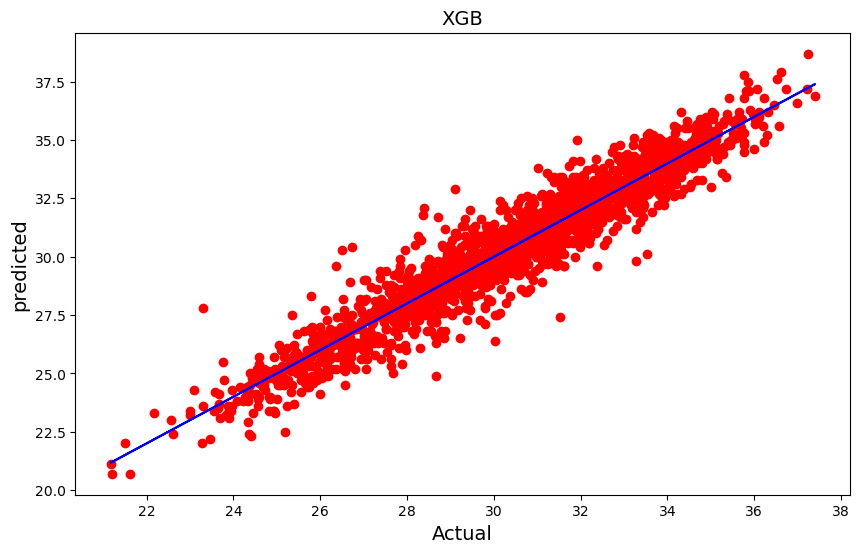

In [60]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_XGB,y=y_test,color='r')
plt.plot(pred_XGB,pred_XGB,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('predicted',fontsize=14)
plt.title('XGB',fontsize=14)
plt.show()

## XGB and rfr both good

In [62]:
from sklearn.model_selection import cross_val_score

In [66]:
score = cross_val_score(rfr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2 score and cross validation score is:',(r2_score(y_test,pred_rfr) - score.mean())*100)

[0.69105589 0.65900035 0.65778681 0.78488485 0.65279616]
0.689104812550754
difference between R2 score and cross validation score is: 21.216036287111027


In [67]:
score = cross_val_score(XGB,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2 score and cross validation score is:',(r2_score(y_test,pred_XGB) - score.mean())*100)

[0.67224148 0.62347971 0.63211592 0.77842614 0.62563805]
0.6663802588870811
difference between R2 score and cross validation score is: 24.550581992483465


# rfr is best

In [68]:
from sklearn.model_selection import GridSearchCV

In [74]:
parameters = {'n_estimators':[1, 2,4,5,6],'max_depth': [10, 20, 30,40,50],'min_samples_split': [2, 5, 10,7,8],'min_samples_leaf': [1, 2, 4,5,7]}

In [75]:
gscv = GridSearchCV(rfr,parameters,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4, 5, 7],
                         'min_samples_split': [2, 5, 10, 7, 8],
                         'n_estimators': [1, 2, 4, 5, 6]})

In [76]:
gscv.best_params_

{'max_depth': 30,
 'min_samples_leaf': 2,
 'min_samples_split': 7,
 'n_estimators': 6}

In [72]:
model = RandomForestRegressor(max_depth = 30,min_samples_leaf =2,min_samples_split=7,n_estimators= 6)

In [77]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('R2_Score:',r2_score(y_test,pred))
print('mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rfr))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

R2_Score: 0.8671194889987659
mean absolute error: 0.8323591647687183
Mean Squared Error: 0.9270158973284439
root mean squared error: 1.1169636922549904


In [78]:
import pickle
filename = 'Temperature_Tmax.pkl'
pickle.dump(model,open(filename,'wb'))

In [79]:
load_model = pickle.load(open('Temperature_Tmax.pkl','rb'))
result = load_model.score(x_test,y_test)
print(result*100)

86.71194889987659


In [80]:
conclusion = pd.DataFrame([load_model.predict(x_test)[:],y_test[:]],index=['Predicted','original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908
Predicted,32.359844,26.424231,27.277679,29.894535,27.35,32.134335,29.999432,29.390278,28.883292,28.460604,...,32.788643,31.125521,25.17125,27.864685,35.434796,30.955804,30.892885,33.654306,31.089423,27.755099
original,31.300000,25.200000,28.200000,29.400000,25.20,31.700000,31.500000,29.300000,29.900000,27.800000,...,32.400000,28.600000,25.60000,28.900000,35.900000,32.200000,32.100000,34.200000,30.900000,26.600000


# let's predict Next_Tmin

In [82]:
#Separating features and label:
x1 = df.drop("Next_Tmin",axis=1)
y1 = df["Next_Tmin"]

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1 = pd.DataFrame(scaler.fit_transform(x1),columns=x1.columns)
x1

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,-1.665619,-0.391082,-0.826791,0.104515,0.270393,-0.574091,-0.269337,0.101611,0.321279,-0.510197,...,-0.556227,-0.518063,-0.488615,-0.440374,1.202373,-0.002818,1.846647,1.322066,1.522899,-0.415089
1,-1.526995,0.712742,-0.739984,-0.309180,0.182925,0.053159,0.195960,-0.635308,-0.208650,-0.542554,...,-0.556227,-0.518063,-0.488615,-0.440374,1.202373,0.513713,0.063295,-0.379811,1.230202,0.046025
2,-1.388370,0.609258,-0.002126,-0.555846,-0.779358,0.138107,0.436115,-0.316685,-1.390386,-0.604531,...,-0.556227,-0.518063,-0.488615,-0.440374,0.663583,0.841270,-0.358288,-0.944431,1.216567,0.243645
3,-1.249745,0.747236,0.041277,0.103417,1.320014,0.001590,-0.124851,-0.667284,0.213494,-0.577583,...,-0.556227,-0.518063,-0.488615,-0.440374,2.008562,0.387730,0.092266,1.243064,1.200957,0.441265
4,-1.111121,0.540269,-0.609774,-0.039194,0.107745,-0.206963,-0.052300,-0.602758,1.325841,-0.826667,...,-0.556227,-0.518063,-0.488615,-0.440374,0.126789,1.811342,-0.283973,-0.396228,1.207085,0.276582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7630,1.106872,-2.322774,-2.389314,-2.212856,-1.389968,-0.666383,-2.398290,-0.023101,-1.965843,-1.204345,...,-0.556227,-0.518063,-0.488615,-0.440374,0.126789,0.614500,-0.716134,-0.273859,-2.117055,-0.909139
7631,1.245497,-2.529741,-2.562928,-1.839647,-0.814025,-1.057505,-2.619596,-0.578055,0.672481,-1.152358,...,-0.556227,-0.518063,-0.488615,-0.440374,-0.681395,1.194024,-1.001285,-1.350649,-2.150736,-0.777392
7632,1.384121,-2.253785,-2.693138,-2.071169,-1.333176,-1.182074,-2.184366,-0.309521,0.395344,-1.292024,...,-0.556227,-0.518063,-0.488615,-0.440374,-0.142605,-1.262652,-1.574810,-1.276180,-2.147159,-0.678582
7633,1.522746,-2.253785,-2.432718,-2.257618,-1.476472,-0.949719,-2.203447,-0.059284,-0.362309,-1.269634,...,-0.556227,-0.518063,-0.488615,-0.440374,-0.412000,-1.035882,-1.396882,-1.068389,-2.158860,-0.579772


In [85]:
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=.30,random_state=i)
    lr = LinearRegression()
    lr.fit(x1_train,y1_train)
    pred = lr.predict(x1_test)
    acc = r2_score(y1_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS=i
print('maximum r2 score',maxAccu,'on Random_state',maxRS)

maximum r2 score 0.8496107800548829 on Random_state 168


In [86]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.25,random_state = maxRS)

In [88]:
LR = LinearRegression()
LR.fit(x1_train,y1_train)
pred_LR=LR.predict(x1_test)
pred_train=LR.predict(x1_train)
print(LR)
print('R2_Score:',r2_score(y1_test,pred_LR))
print('R2_score on training data:',r2_score(y1_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y1_test,pred_LR))
print('Mean Squared Error:',mean_squared_error(y1_test,pred_LR))
print('root mean squared error:',np.sqrt(mean_squared_error(y1_test,pred_LR)))

LinearRegression()
R2_Score: 0.8514724987447331
R2_score on training data: 83.23790731411167
mean absolute error: 0.7426754372690006
Mean Squared Error: 0.8873546041416986
root mean squared error: 0.9419950128008633


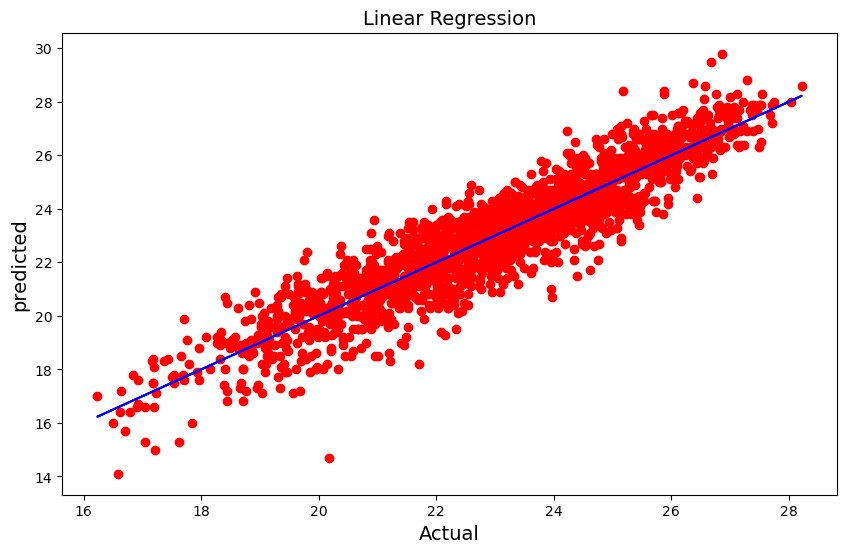

In [89]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y1_test,color='r')
plt.plot(pred_LR,pred_LR,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('predicted',fontsize=14)
plt.title('Linear Regression',fontsize=14)
plt.show()

In [90]:
rfr = RandomForestRegressor()
rfr.fit(x1_train,y1_train)
pred_rfr=rfr.predict(x1_test)
pred_train=rfr.predict(x1_train)
print(rfr )
print('R2_Score:',r2_score(y1_test,pred_rfr ))
print('R2_score on training data:',r2_score(y1_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y1_test,pred_rfr))
print('Mean Squared Error:',mean_squared_error(y1_test,pred_rfr))
print('root mean squared error:',np.sqrt(mean_squared_error(y1_test,pred_rfr)))

RandomForestRegressor()
R2_Score: 0.9145555180935264
R2_score on training data: 98.52786348216804
mean absolute error: 0.5385997904662123
Mean Squared Error: 0.5104748533263487
root mean squared error: 0.7144752293301347


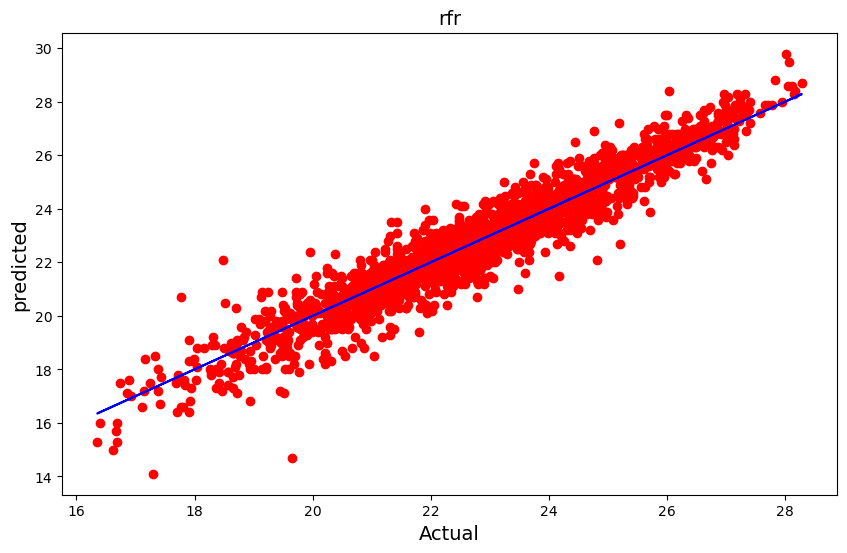

In [91]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_rfr,y=y1_test,color='r')
plt.plot(pred_rfr,pred_rfr,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('predicted',fontsize=14)
plt.title('rfr',fontsize=14)
plt.show()

In [92]:
XGB=XGBRegressor()
XGB.fit(x1_train,y1_train)
pred_XGB=XGB.predict(x1_test)
pred_train=XGB.predict(x1_train)
print(XGB)
print('R2_Score:',r2_score(y1_test,pred_XGB))
print('R2_score on training data:',r2_score(y1_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y1_test,pred_XGB))
print('Mean Squared Error:',mean_squared_error(y1_test,pred_XGB))
print('root mean squared error:',np.sqrt(mean_squared_error(y1_test,pred_XGB)))

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
R2_Score: 0.9351152912130974
R2_score on training data: 99.15947408243144
mean absolute error: 0.4715120157688435
Mean Squared Error: 0.3876436659464078
root mean squared error: 0.6226103644707561


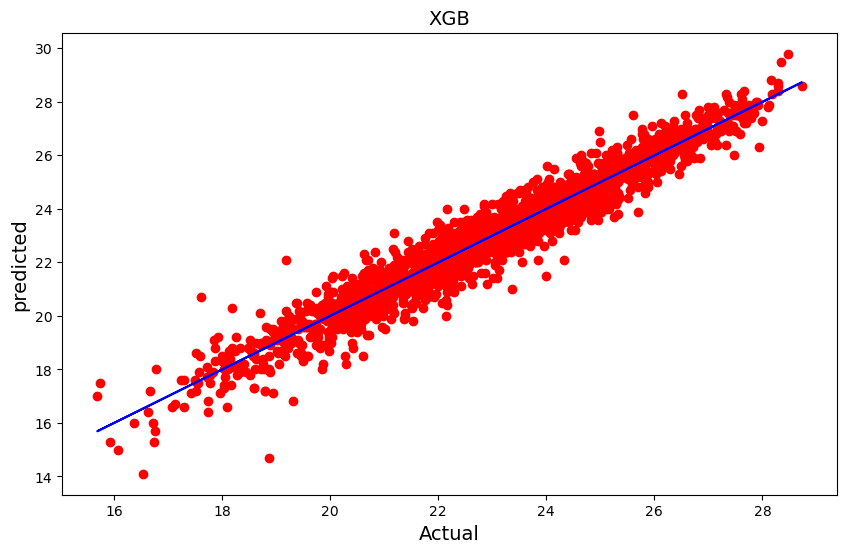

In [93]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_XGB,y=y1_test,color='r')
plt.plot(pred_XGB,pred_XGB,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('predicted',fontsize=14)
plt.title('XGB',fontsize=14)
plt.show()

XGB and rfr both good

In [94]:
score = cross_val_score(rfr,x1,y1,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2 score and cross validation score is:',(r2_score(y1_test,pred_rfr) - score.mean())*100)

[0.69933578 0.67718995 0.81388375 0.86043624 0.84498393]
0.7791659296942658
difference between R2 score and cross validation score is: 13.538958839926064


In [95]:
score = cross_val_score(XGB,x1,y1,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2 score and cross validation score is:',(r2_score(y1_test,pred_XGB) - score.mean())*100)

[0.65824166 0.68252452 0.82378872 0.8549105  0.84374967]
0.7726430150875068
difference between R2 score and cross validation score is: 16.24722761255907


# rfr has least difference so i choose rfr

In [96]:
gscv = GridSearchCV(rfr,parameters,cv=5)
gscv.fit(x1_train,y1_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4, 5, 7],
                         'min_samples_split': [2, 5, 10, 7, 8],
                         'n_estimators': [1, 2, 4, 5, 6]})

In [97]:
gscv.best_params_

{'max_depth': 40,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 6}

In [98]:
model = RandomForestRegressor(max_depth = 40,min_samples_leaf =4,min_samples_split=2,n_estimators= 6)

In [108]:
model.fit(x1_train,y1_train)
pred=model.predict(x1_test)
print('R2_Score:',r2_score(y1_test,pred))
print('mean absolute error:',mean_absolute_error(y1_test,pred))
print('Mean Squared Error:',mean_squared_error(y1_test,pred_rfr))
print('root mean squared error:',np.sqrt(mean_squared_error(y1_test,pred)))

R2_Score: 0.8892774696323505
mean absolute error: 0.6245920428909756
Mean Squared Error: 0.5104748533263487
root mean squared error: 0.8133232122685017


In [109]:
import joblib
joblib.dump(model,"Next_Tmin.pkl")

['Next_Tmin.pkl']

In [110]:
# Loading the saved model
model_1=joblib.load("Next_Tmin.pkl")

#Prediction
prediction_1 = model_1.predict(x1_test)
prediction_1


array([23.71867414, 24.97188492, 27.00662393, ..., 23.00883838,
       21.46642857, 24.29284722])

In [112]:
conclusion_1 = pd.DataFrame([model_1.predict(x1_test)[:],y1_test[:]],index=['Predicted','original'])
conclusion_1

,0,1,2,3,4,5,6,7,8,9,...,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908
Predicted,23.718674,24.971885,27.006624,25.637308,21.680471,26.376806,23.172474,22.838099,21.260332,20.348727,...,20.461991,23.706854,23.188193,26.434087,22.924259,20.652368,24.144844,23.008838,21.466429,24.292847
original,23.400000,25.700000,26.900000,26.200000,21.200000,26.500000,23.200000,22.500000,21.000000,21.200000,...,20.000000,22.100000,23.500000,27.000000,22.200000,19.700000,24.300000,23.200000,21.700000,24.200000
